<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


# Visualising The Data

## Boxplot showing median value of owner-occupied homes

Text(0, 0.5, 'Value (thousands of dollars)')

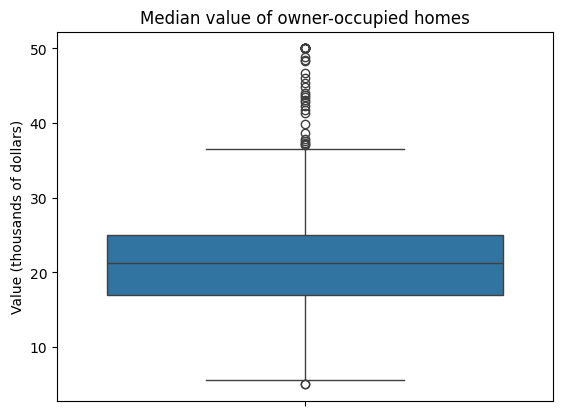

In [12]:
ax = sns.boxplot(y='MEDV', data=boston_df)
ax.set_title('Median value of owner-occupied homes')
ax.set_ylabel('Value (thousands of dollars)')


## Bar plot showing Charles River variable

Text(0, 0.5, 'Count')

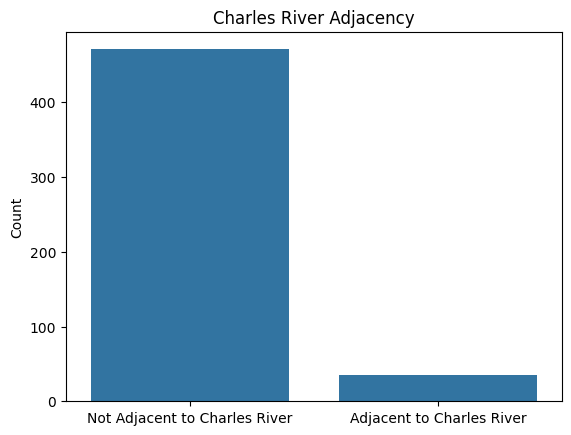

In [53]:
ax = sns.countplot(x='CHAS', data=boston_df)
ax.set_title('Charles River Adjacency')
ax.set_xlabel('')
ax.set_xticks([0, 1])
ax.set_xticklabels(['Not Adjacent to Charles River', 'Adjacent to Charles River'])
ax.set_ylabel('Count')


## Boxplot for the MEDV variable vs AGE

Text(0, 0.5, 'MEDV')

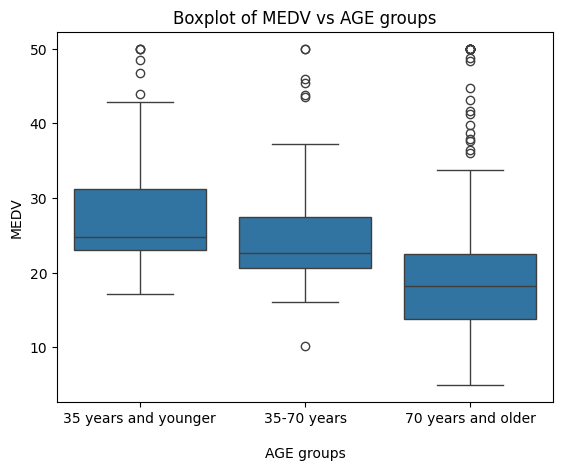

In [64]:
# Discretize the AGE variable into three groups
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=['35 years and younger', '35-70 years', '70 years and older'])

ax = sns.boxplot(x='AGE_group', y='MEDV', data=boston_df)

ax.set_title('Boxplot of MEDV vs AGE groups')
ax.set_xlabel('\nAGE groups')
ax.set_ylabel('MEDV')

## Scatter plot showing relationship between Nitric Oxide concentrations and the proportion of non-retail business acres per town

Text(0, 0.5, 'Nitric Oxide Concentrations')

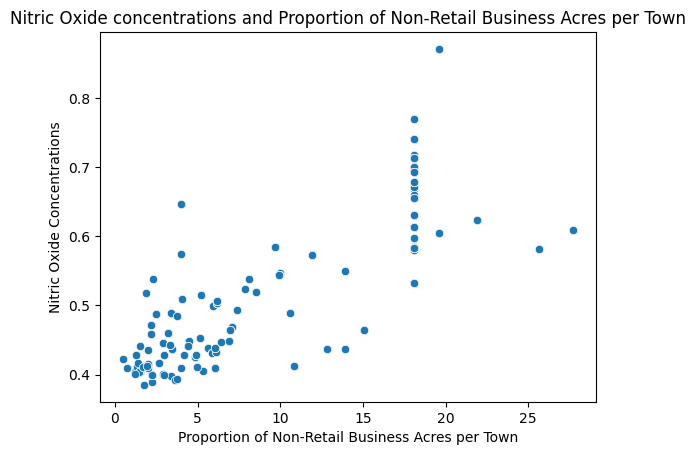

In [67]:
ax = sns.scatterplot(x='INDUS', y='NOX', data=boston_df)

ax.set_title('Nitric Oxide concentrations and Proportion of Non-Retail Business Acres per Town')
ax.set_xlabel('Proportion of Non-Retail Business Acres per Town')
ax.set_ylabel('Nitric Oxide Concentrations')

## Histogram showing pupil to teacher ratio

Text(0, 0.5, 'Frequency')

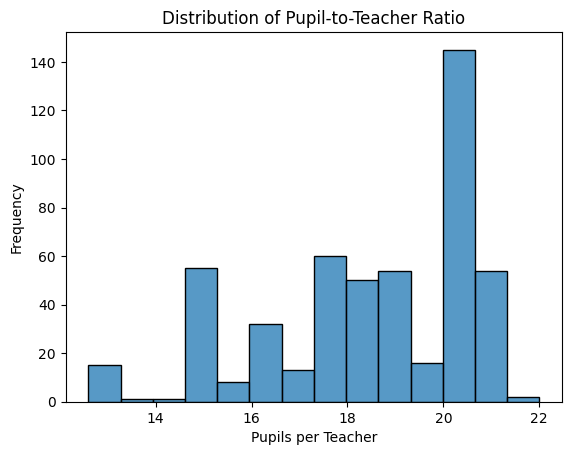

In [84]:
ax = sns.histplot(boston_df['PTRATIO'])

ax.set_title('Distribution of Pupil-to-Teacher Ratio')
ax.set_xlabel('Pupils per Teacher')
ax.set_ylabel('Frequency')

# Statistical Tests

### Is there a significant difference in median value of houses bounded by the Charles River or not? (T-test for independent samples)

**Null Hypothesis:** There is no difference in house value as a result of being close to the Charles River.

**Alternative Hypothesis:** There is a difference in house value as a result of being close to the Charles River.

In [92]:
river_adjacent_house_price = boston_df[boston_df['CHAS'] == 1]['MEDV']
non_river_adjacent_house_price = boston_df[boston_df['CHAS'] == 0]['MEDV']

# Perform the independent samples t-test
t_stat, p_value = scipy.stats.ttest_ind(river_adjacent_house_price, non_river_adjacent_house_price)

print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

T-statistic: 3.996437466090509
P-value: 7.390623170519905e-05


P value is less than 0.05 therefore there ***is*** a statistically significant difference in the median value of houses between those bounded by the Charles River and those not bounded by the river.

With 504 degrees of freedom for the t-test (471 + 35 - 2) and a significance level of 0.05 (two-tailed), the critical value is approximately 1.96. Since the t-statistic (3.996) is greater than 1.96, it also confirms the result ***is*** statistically significant.

We ***reject*** the null hypothesis.

### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

**Null Hypothesis:** There is no difference in house value as a result of age of the house.

**Alternative Hypothesis:** There is a difference in house value as a result of age of the house

In [98]:
group_35_and_younger = boston_df[boston_df['AGE_group'] == '35 years and younger']['MEDV']
group_35_to_70 = boston_df[boston_df['AGE_group'] == '35-70 years']['MEDV']
group_70_and_older = boston_df[boston_df['AGE_group'] == '70 years and older']['MEDV']

# Perform the ANOVA test
f_stat, p_value = scipy.stats.f_oneway(group_35_and_younger, group_35_to_70, group_70_and_older)

print(f'F-statistic: {f_stat}')
print(f'P-value: {p_value}')

F-statistic: 36.40764999196599
P-value: 1.7105011022702984e-15


P value is less than 0.05 therefore there ***is*** a statistically significant difference in the proportion of owner-occupied units depending on the age of the house.

We ***reject*** the null hypothesis.

### Can we conclude that there is no relationship between Nitric Oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)



**Null Hypothesis:** There is no relationship between Nitric Oxide concentrations and proportion of non-retail business acres per town.

**Alternative Hypothesis:** There is a relationship between Nitric Oxide concentrations and proportion of non-retail business acres per town

In [99]:
correlation, p_value = scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

print(f'Pearson correlation coefficient: {correlation}')
print(f'P-value: {p_value}')

Pearson correlation coefficient: 0.7636514469209192
P-value: 7.913361061210442e-98


The Pearson correlation coefficient suggests a ***strong positive linear relationship*** between Nitric Oxide concentrations and the proportion of non-retail business acres per town. In other words, as the proportion of non-retail business acres increases, Nitric Oxide concentrations tend to increase as well.

The very small p-value (much less than 0.05) indicates that the observed correlation ***is*** statistically significant. This means that the relationship between NOX and INDUS is unlikely to be due to random chance.

We ***reject*** the null hypothesis.

### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)



**Null Hypothesis:** There is no relationship between house value and distance from an employment centre.

**Alternative Hypothesis:** There is a relationship between house value and distance from an employment centre.

In [100]:
X = boston_df['DIS']
y = boston_df['MEDV']

# Add a constant (intercept) to the model
X = sm.add_constant(X)

# Perform the linear regression
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 06 Feb 2025   Prob (F-statistic):           1.21e-08
Time:                        11:40:17   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

R-squared: 0.062: This indicates that approximately 6.2% of the variance in the median home values (MEDV) ***can*** be explained by the weighted distance to employment centres (DIS). This is relatively low, suggesting that DIS alone isn't a strong predictor of MEDV.

Intercept (const): 18.3901: This is the predicted median home value when the weighted distance (DIS) is zero.

DIS coefficient: 1.0916: This indicates that for each additional unit increase in the weighted distance to employment centres, the median home value increases by approximately $1,091.60, assuming other factors remain constant. This positive coefficient suggests that being farther from employment centres is associated with higher home values in this dataset.

P>|t| for DIS: 0.000: This p-value is much less than 0.05, indicating that the relationship between DIS and MEDV ***is*** statistically significant. Hence, we can confidently say that the weighted distance to employment centres has a significant impact on the median home value.

F-statistic: 33.58: This measures the overall significance of the regression model. With a corresponding p-value of 1.21e-08, it indicates that the model ***is*** statistically significant.

We ***reject*** the null hypothesis.